<a href="https://colab.research.google.com/github/Alaqmar-Damana/Duplicate-Question-Pairs/blob/main/Duplicate_Question_Pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('retrieval/train.csv.zip')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.sample(10)#random samples from our dataset

,id,qid1,qid2,question1,question2,is_duplicate
158152,158152,247121,247122,How can I get free food regularly?,What are some of the best ways to get free food?,1
115047,115047,187674,187675,Why do people still want capitalism when its c...,Why do people still support Capitalism even th...,0
372155,372155,502853,502854,How can you have a good day?,What does it take to have a good day?,1
264065,264065,380750,380751,"Is there a fact based American History book, t...","I have done diploma course, am I eligable for ...",0
376566,376566,507730,85644,What you have learned from life so far?,What have you learned from your life?,1
127213,127213,204846,204847,BusinessObjects company is service based or pr...,Is accenture service based or product based co...,0
81416,81416,138232,138233,Why doesn't my saliva quench my thirst?,Why does only water quench our thirst?,0
75949,75949,129893,129894,What is the story of your first kiss?,What went through your mind during your first ...,0
346654,346654,475029,475030,What is the academic pressure and workload at ...,What is the academic pressure and workload at ...,1
310001,310001,434055,32576,What are some tips on making it through the jo...,What are some tips on making it through the jo...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.duplicated().sum()#to check if any row is completely duplicated or not
#0 says that there are no rows that are completely duplicate

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

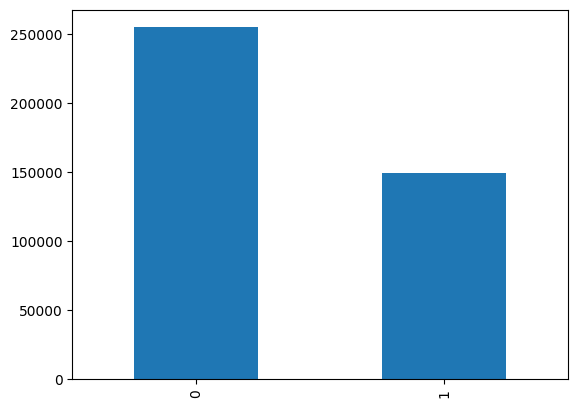

In [ ]:
#Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
#repeated questions

qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions: ', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated: ', x[x].shape[0])

Number of unique questions:  537933
Number of questions getting repeated:  111780


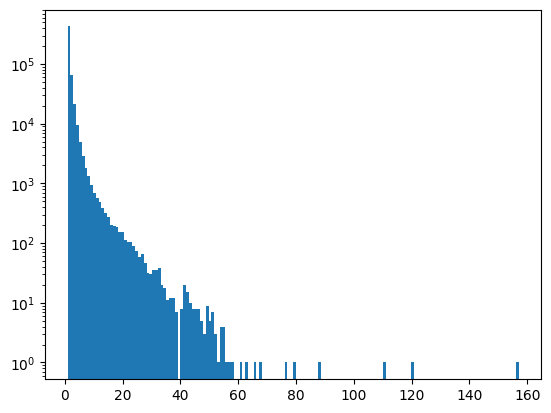

In [ ]:
#Repeated questions histogram
plt.hist(qid.value_counts().values , bins=160)
plt.yscale('log')
plt.show()

#BASELINE MODEL

**I'll create a baseline model using `bag of words` and I'll just select some data from the dataset**

In [ ]:
new_df = df.sample(30000)

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
883,What is the hardest thing(s) about raising chi...,What is the hardest thing(s) about raising chi...
37464,How do I select High- neck thigh lengh tops an...,"How do I select High- neck, thigh lengh tops a..."
59773,"If the Big Bang created everything, how did th...",How did the Big Bang happen when there wasn't ...
304007,How many types of bridges are there? What are ...,What is the purpose of Book of Revelation?
36903,Data Networks: How does Go-Back-N ARQ protocol...,What protocol is used in Facebook Chat?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
304007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.741

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7263333333333334

**So now the target is to get an accuracy greater than 74.1%**

#Let's start again!

This time I'll do some feature enginnering.

Also I'll use techniques to preprocess the data

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer


import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df = pd.read_csv('retrieval/train.csv.zip')

In [ ]:
df = df.sample(30000, random_state=42)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


#Text Preprocessing

In [ ]:
def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [ ]:
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [ ]:
# clean text
df['text1'] = df['question1'].apply(clean_text)
df['text2'] = df['question2'].apply(clean_text)
# remove stopwords
df['text1'] = df['text1'].apply(remove_stopwords)
df['text2'] = df['text2'].apply(remove_stopwords)
# lemmatize
df['text1'] = df['text1'].apply(lemmatize)
df['text2'] = df['text2'].apply(lemmatize)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,text1,text2
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,how do i play pokémon go in korea,how do i play pokémon go in china
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,which more advisable well material for crash t...,what best server setup for buddypress
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,how do i improve logical programming skill,how can i improve my logical skill for program
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,how close we be see rd world war,how close world war iii


#Feature Engineering

In [ ]:
df['q1_len'] = df['question1'].str.len() 
df['q2_len'] = df['question2'].str.len()
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,text1,text2,q1_len,q2_len
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,how do i play pokémon go in korea,how do i play pokémon go in china,34,34
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken,53,51
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,which more advisable well material for crash t...,what best server setup for buddypress,96,45
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,how do i improve logical programming skill,how can i improve my logical skill for program,44,52
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,how close we be see rd world war,how close world war iii,38,29


In [ ]:
df.drop(['question1','question2'],axis=1, inplace=True)

In [ ]:
df.head()

,id,qid1,qid2,is_duplicate,text1,text2,q1_len,q2_len
8067,8067,15738,15739,0,how do i play pokémon go in korea,how do i play pokémon go in china,34,34
368101,368101,12736,104117,0,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken,53,51
70497,70497,121486,121487,0,which more advisable well material for crash t...,what best server setup for buddypress,96,45
226567,226567,254474,258192,1,how do i improve logical programming skill,how can i improve my logical skill for program,44,52
73186,73186,48103,3062,1,how close we be see rd world war,how close world war iii,38,29


In [ ]:
df['q1_num_words'] = df['text1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['text2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,is_duplicate,text1,text2,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,0,how do i play pokémon go in korea,how do i play pokémon go in china,34,34,8,8
368101,368101,12736,104117,0,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken,53,51,10,9
70497,70497,121486,121487,0,which more advisable well material for crash t...,what best server setup for buddypress,96,45,13,6
226567,226567,254474,258192,1,how do i improve logical programming skill,how can i improve my logical skill for program,44,52,7,9
73186,73186,48103,3062,1,how close we be see rd world war,how close world war iii,38,29,8,5


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['text1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['text2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,is_duplicate,text1,text2,q1_len,q2_len,q1_num_words,q2_num_words,word_common
8067,8067,15738,15739,0,how do i play pokémon go in korea,how do i play pokémon go in china,34,34,8,8,7
368101,368101,12736,104117,0,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken,53,51,10,9,6
70497,70497,121486,121487,0,which more advisable well material for crash t...,what best server setup for buddypress,96,45,13,6,1
226567,226567,254474,258192,1,how do i improve logical programming skill,how can i improve my logical skill for program,44,52,7,9,5
73186,73186,48103,3062,1,how close we be see rd world war,how close world war iii,38,29,8,5,4


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['text1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['text2'].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,is_duplicate,text1,text2,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
8067,8067,15738,15739,0,how do i play pokémon go in korea,how do i play pokémon go in china,34,34,8,8,7,16
368101,368101,12736,104117,0,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken,53,51,10,9,6,19
70497,70497,121486,121487,0,which more advisable well material for crash t...,what best server setup for buddypress,96,45,13,6,1,19
226567,226567,254474,258192,1,how do i improve logical programming skill,how can i improve my logical skill for program,44,52,7,9,5,16
73186,73186,48103,3062,1,how close we be see rd world war,how close world war iii,38,29,8,5,4,13


In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,is_duplicate,text1,text2,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,8067,15738,15739,0,how do i play pokémon go in korea,how do i play pokémon go in china,34,34,8,8,7,16,0.44
368101,368101,12736,104117,0,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken,53,51,10,9,6,19,0.32
70497,70497,121486,121487,0,which more advisable well material for crash t...,what best server setup for buddypress,96,45,13,6,1,19,0.05
226567,226567,254474,258192,1,how do i improve logical programming skill,how can i improve my logical skill for program,44,52,7,9,5,16,0.31
73186,73186,48103,3062,1,how close we be see rd world war,how close world war iii,38,29,8,5,4,13,0.31


In [ ]:
ques_df = df[['text1','text2']]
ques_df.head()

,text1,text2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
368101,what be some of best side dish for crab cake,what be some good side dish for buffalo chicken
70497,which more advisable well material for crash t...,what best server setup for buddypress
226567,how do i improve logical programming skill,how can i improve my logical skill for program
73186,how close we be see rd world war,how close world war iii


In [ ]:
final_df = df.drop(columns=['id','qid1','qid2','text1','text2'])
print(final_df.shape)

(30000, 8)


In [ ]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,0,34,34,8,8,7,16,0.44
368101,0,53,51,10,9,6,19,0.32
70497,0,96,45,13,6,1,19,0.05
226567,1,44,52,7,9,5,16,0.31
73186,1,38,29,8,5,4,13,0.31


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['text1']) + list(ques_df['text2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,34,34,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,53,51,10,9,6,19,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,96,45,13,6,1,19,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,1,44,52,7,9,5,16,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,1,38,29,8,5,4,13,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7736666666666666